In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd
import dlsfunctions as dls

In [2]:
# LEFT LEANING DISTRIBUTION

In [3]:
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
mean = diameter - 3e-9
sigma = 2e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, mean, sigma, c)

In [4]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [5]:
theta_input = np.append(f_1, beta)

In [6]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)

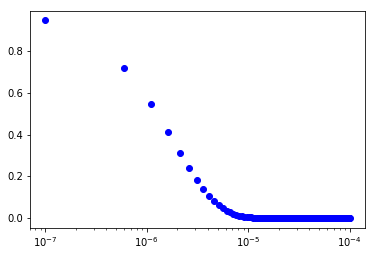

In [8]:
plt.semilogx(time_in, sim_data, 'bo')

In [9]:
ndim = 21
nwalkers = 100
nsteps = 4000

In [10]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [11]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [12]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


array([0.35175, 0.33425, 0.36175, 0.359  , 0.3435 , 0.35225, 0.35775,
       0.35875, 0.37   , 0.35725, 0.35475, 0.343  , 0.34825, 0.3635 ,
       0.3435 , 0.3725 , 0.358  , 0.3455 , 0.34875, 0.348  , 0.35275,
       0.345  , 0.35875, 0.351  , 0.369  , 0.347  , 0.33325, 0.3385 ,
       0.356  , 0.36325, 0.3385 , 0.34325, 0.33975, 0.353  , 0.35975,
       0.37025, 0.3595 , 0.35625, 0.35625, 0.35175, 0.35525, 0.371  ,
       0.34775, 0.346  , 0.35875, 0.348  , 0.37225, 0.35525, 0.359  ,
       0.36025, 0.35   , 0.35475, 0.3555 , 0.35125, 0.36275, 0.36075,
       0.353  , 0.34075, 0.346  , 0.35625, 0.3535 , 0.371  , 0.35125,
       0.35775, 0.348  , 0.35725, 0.3585 , 0.362  , 0.3585 , 0.36775,
       0.33975, 0.364  , 0.35425, 0.355  , 0.35375, 0.35425, 0.34975,
       0.35325, 0.3545 , 0.34775, 0.35625, 0.35225, 0.3645 , 0.3425 ,
       0.3425 , 0.351  , 0.3505 , 0.366  , 0.3535 , 0.3425 , 0.3665 ,
       0.3545 , 0.34375, 0.346  , 0.3605 , 0.353  , 0.3455 , 0.344  ,
       0.3565 , 0.36

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

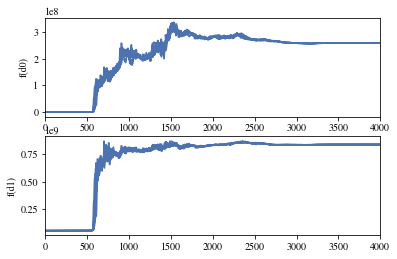

In [13]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

In [20]:
samples = sampler.chain[:,3000:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [21]:
q

,f(d0),f(d1),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9),...,f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19),beta
0.16,2.578197e+08,8.377094e+08,1.334947e+09,8.077315e+08,4.521748e+08,1.965507e+08,4.303285e+08,88.396776,305.975655,767.121486,...,5.125749e+08,5.561573e+08,4.373233e+08,4.027221e+08,2.009054e+08,2.291352e+08,1.052121e+08,1.483085e+08,1.166263e+08,0.029903
0.50,2.583718e+08,8.396263e+08,1.335101e+09,8.082310e+08,4.533483e+08,1.970343e+08,4.316036e+08,670.329902,2127.247572,3109.964931,...,5.134032e+08,5.570364e+08,4.380391e+08,4.036982e+08,2.015280e+08,2.294955e+08,1.053981e+08,1.486420e+08,1.171332e+08,0.764325
0.84,2.584889e+08,8.397598e+08,1.335645e+09,8.084751e+08,4.536167e+08,1.972354e+08,4.319150e+08,5410.095859,13923.623615,57427.241498,...,5.137361e+08,5.573363e+08,4.381994e+08,4.040458e+08,2.018254e+08,2.298221e+08,1.054775e+08,1.487867e+08,1.172310e+08,1.013741


In [18]:
q_50 = q.quantile([0.5], axis=0)
q_50_array = q_50.values
q_50_array = q_50_array.flatten()

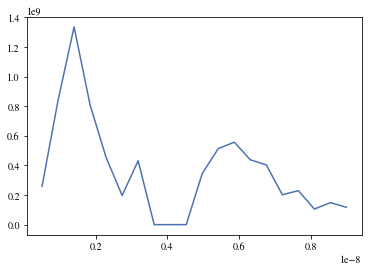

In [19]:
plt.plot(d, q_50_array)

In [22]:
infer_g2 = dls.g2(np.append(q_50_array, 0.764), d, m, gamma, time_in)

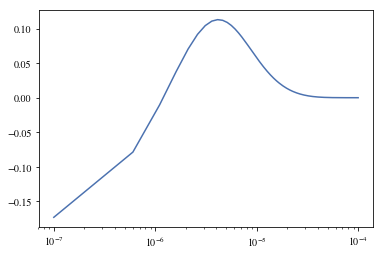

In [23]:
plt.semilogx(time_in, infer_g2 - sim_data)

In [24]:
dls.check_distribution_norm(q_50_array, d[1] - d[0])

3.2188169205976034